In [1]:
from pathlib import Path

import pandas as pd
from loguru import logger
from sklearn.model_selection import train_test_split

import mlflow
#import mlflow.xgboost
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
import xgboost as xgb
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as pp
from scripts.data_utils import DataLoader

In [2]:
data_path = Path.home() / 'data/craig_pfc_2023/step_2_cleaned'
project_path = Path.cwd().parent

assert data_path.exists()
assert project_path.exists()

In [3]:
[i for i in data_path.glob('*.pqt')]

[PosixPath('/Users/erdemkarakoylu/data/craig_pfc_2023/step_2_cleaned/df_phy.pqt'),
 PosixPath('/Users/erdemkarakoylu/data/craig_pfc_2023/step_2_cleaned/df_rrs.pqt'),
 PosixPath('/Users/erdemkarakoylu/data/craig_pfc_2023/step_2_cleaned/df_env.pqt'),
 PosixPath('/Users/erdemkarakoylu/data/craig_pfc_2023/step_2_cleaned/df_all.pqt')]

In [4]:
loader = DataLoader(
    data_path=data_path, rrs_file = 'df_rrs.pqt', phy_file='df_phy.pqt', env_file='df_env.pqt')

2025-02-25 14:34:26.476 | DEBUG    | scripts.data_utils:__init__:17 - Data directory set to /Users/erdemkarakoylu/data/craig_pfc_2023/step_2_cleaned
2025-02-25 14:34:26.477 | DEBUG    | scripts.data_utils:__init__:18 - Rrs file used: df_rrs.pqt
2025-02-25 14:34:26.478 | DEBUG    | scripts.data_utils:__init__:19 - Phytoplankton file use df_phy.pqt
2025-02-25 14:34:26.479 | DEBUG    | scripts.data_utils:__init__:21 - Env file used: df_env.pqt


In [5]:
drrs, dphyto, denv = loader.load_data()

In [6]:
denv.head()

,dia,chl,cya,coc,din,pha,tot_cphyl
9,4.020039e-07,9.228475e-32,7.734924e-25,2.793631e-12,6.664053e-32,0.580815,0.580816
10,5.311658e-07,1.982182e-31,2.328640e-24,5.387787e-12,8.242992e-32,0.292451,0.292451
11,5.978775e-07,4.406061e-31,6.890358e-24,7.807611e-12,1.085986e-31,0.208651,0.208651
12,5.402634e-07,4.884837e-31,7.942443e-24,6.966778e-12,9.707731e-32,0.214010,0.214010
13,4.718567e-07,4.217055e-31,6.891656e-24,5.505389e-12,8.635218e-32,0.236728,0.236729


In [10]:
drrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261607 entries, 9 to 2089135
Columns: 501 entries, 250 to 750
dtypes: float64(501)
memory usage: 4.7 GB


In [ ]:
from sklearn.decomposition import 

In [11]:
denv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261607 entries, 9 to 2089135
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   lat      1261607 non-null  float64
 1   temp     1261607 non-null  float64
 2   nitrate  1261607 non-null  float64
 3   iron     1261607 non-null  float64
 4   silica   1261607 non-null  float64
dtypes: float64(5)
memory usage: 57.8 MB


In [12]:
pca_rrs = PCA(n_components=100, random_state=42)

In [48]:
pca_all = PCA(n_components = drrs.shape[1] + denv.shape[1], random_state=42)

In [13]:
comp_rrs = pca_rrs.fit_transform(drrs)

In [68]:
d_all = pd.concat((drrs, denv), axis=1)

In [67]:
denv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261607 entries, 9 to 2089135
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   lat      1261607 non-null  float64
 1   temp     1261607 non-null  float64
 2   nitrate  1261607 non-null  float64
 3   iron     1261607 non-null  float64
 4   silica   1261607 non-null  float64
dtypes: float64(5)
memory usage: 57.8 MB


In [66]:
drrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1261607 entries, 9 to 2089135
Columns: 501 entries, 250 to 750
dtypes: float64(501)
memory usage: 4.7 GB


In [65]:
d_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2523214 entries, 9 to 2089135
Data columns (total 506 columns):
 #    Column   Dtype  
---   ------   -----  
 0    250      float64
 1    251      float64
 2    252      float64
 3    253      float64
 4    254      float64
 5    255      float64
 6    256      float64
 7    257      float64
 8    258      float64
 9    259      float64
 10   260      float64
 11   261      float64
 12   262      float64
 13   263      float64
 14   264      float64
 15   265      float64
 16   266      float64
 17   267      float64
 18   268      float64
 19   269      float64
 20   270      float64
 21   271      float64
 22   272      float64
 23   273      float64
 24   274      float64
 25   275      float64
 26   276      float64
 27   277      float64
 28   278      float64
 29   279      float64
 30   280      float64
 31   281      float64
 32   282      float64
 33   283      float64
 34   284      float64
 35   285      float64
 36   286      fl

In [57]:
new_columns = {k: str(k) for k in d_all.columns}

In [58]:
d_all.rename(columns=new_columns, inplace=True)

In [61]:
d_all.dropna(inplace=True)

In [62]:
comp_all = pca_all.fit_transform(d_all)

ValueError: Found array with 0 sample(s) (shape=(0, 506)) while a minimum of 1 is required by PCA.

In [15]:
comp_rrs.shape

(1261607, 100)

In [24]:
import seaborn as sb

In [ ]:
sb.bar

In [33]:
sb.palettes.blend_palette(n_colors=10)

TypeError: blend_palette() missing 1 required positional argument: 'colors'

In [ ]:
f

In [47]:
pca_rrs.

501

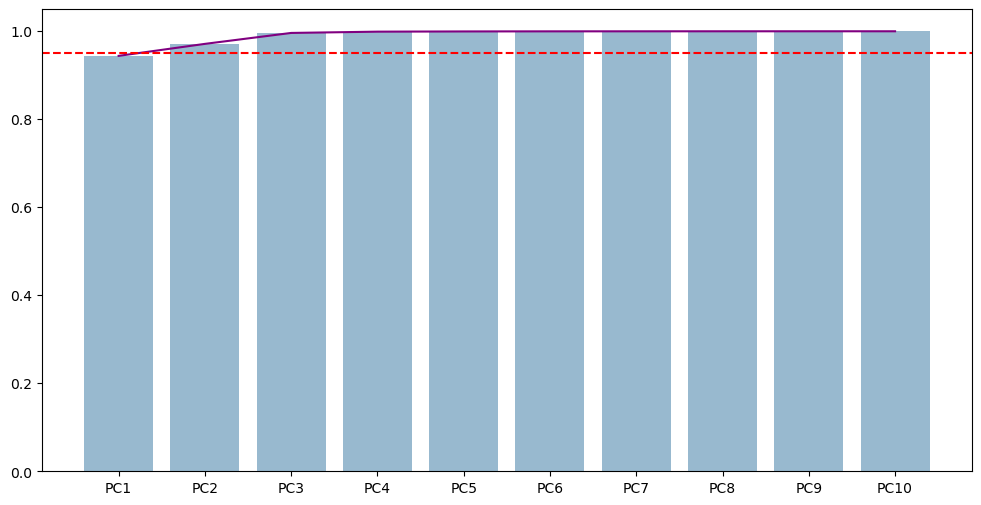

In [44]:
variance_threshold=0.95
f, ax = pp.subplots(figsize=(12, 6))
pcs = [i for i in range(10)]
xtlbl = [f'PC{i+1}' for i in range(10)]
data = np.cumsum(pca_rrs.explained_variance_ratio_[:10])
#ax.plot(data)
sb.barplot(x=xtlbl, y=data,  ax=ax, alpha=0.5)#palette=sb.palettes.blend_palette(10))
sb.lineplot(x=xtlbl, y=data, ax=ax, color='purple')
ax.axhline(y=variance_threshold, ls='--', color='r')
